In [1]:
library(Seurat)
library(ggplot2)
library(R.matlab)
library(anndata)
library(MySeuratWrappers)
library(scRNAtoolVis)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

R.matlab v3.7.0 (2022-08-25 21:52:34 UTC) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen


Loading required package: dplyr

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Lo

In [2]:
mytheme <- theme(panel.border = element_rect(size = 1.5, colour = "grey25"),
                 axis.line = element_blank(),
                 axis.ticks = element_blank(),
                 axis.title = element_blank(),
                 axis.text = element_blank(),
                 legend.position = "none",
                 plot.title = element_blank(),
                 legend.text = element_text(size = 14))

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [70]:
CD45pPBMC.NK <- readRDS("/home/suyanchi/project/dab/results/case/rds/PBMC.NK.rds")
CD45pPBMC.NK

An object of class Seurat 
19845 features across 4320 samples within 2 assays 
Active assay: RNA (17845 features, 2000 variable features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne

In [71]:
CD45pPBMC.NK$seurat_clusters = droplevels(CD45pPBMC.NK$seurat_clusters)

Warning message in FetchData.Seurat(object = object, vars = features, slot = slot):
“The following requested variables were not found: percent.mt”


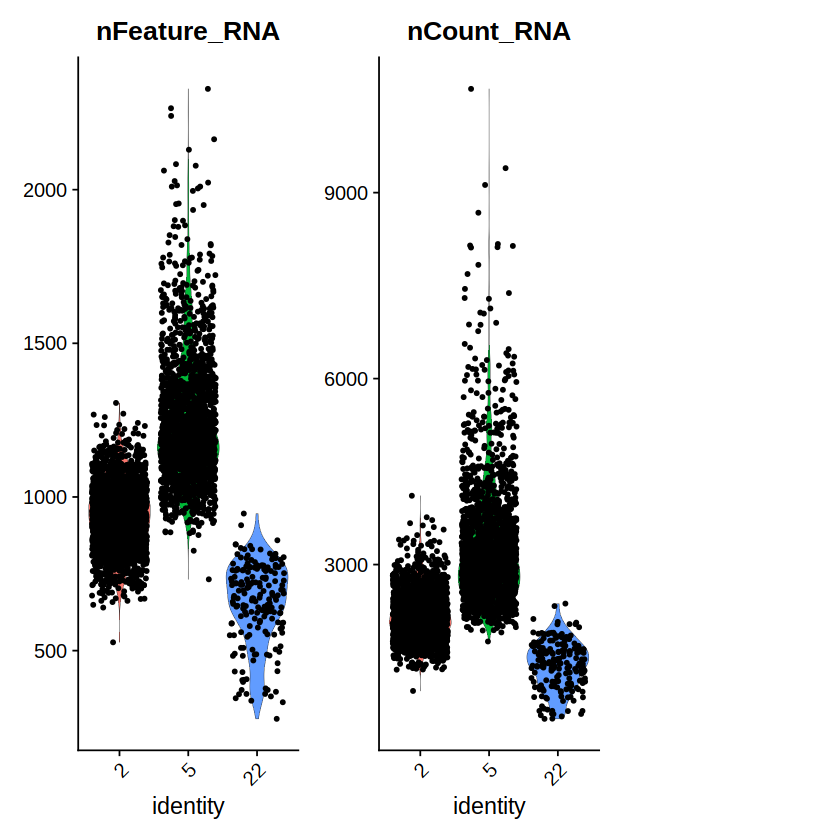

In [72]:
# Visualize QC metrics as a violin plot
VlnPlot(CD45pPBMC.NK, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

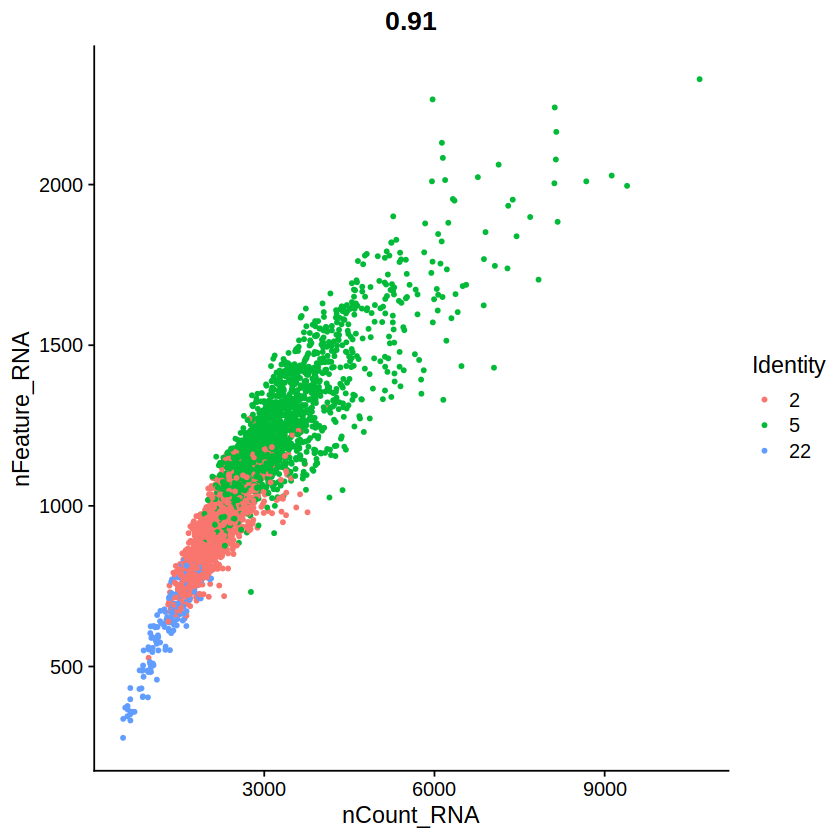

In [73]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot2 <- FeatureScatter(CD45pPBMC.NK, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot2

In [74]:
CD45pPBMC.NK <- subset(CD45pPBMC.NK, subset = nFeature_RNA > 100 & nFeature_RNA < 1500)

In [78]:
CD45pPBMC.NK <- NormalizeData(CD45pPBMC.NK, normalization.method = "LogNormalize", scale.factor = 10000)
CD45pPBMC.NK <- FindVariableFeatures(CD45pPBMC.NK, selection.method = "vst", nfeatures = 2000)
DefaultAssay(CD45pPBMC.NK) <- "integrated"
CD45pPBMC.NK <- ScaleData(CD45pPBMC.NK, features = rownames(CD45pPBMC.NK))
CD45pPBMC.NK <- RunPCA(CD45pPBMC.NK, features = VariableFeatures(CD45pPBMC.NK))
# Run PCA and Determine Dimensions for 90% Variance
PCDeterminators <- function(object){
  stdev <- object@reductions$pca@stdev
  var <- stdev^2
  endVar <- 0
  for(i in 1:length(var)){
    total <- sum(var)
    numerator <- sum(var[1:i])
    exp.var <- numerator/total
    if(endVar == 0){
      if(exp.var > 0.9){
        endVar <- endVar + 1
        PC.num <- i
      }
    }
  }
  sum(var[1:PC.num])/sum(var)
  return(PC.num)
}
PC.num <- PCDeterminators(CD45pPBMC.NK)
CD45pPBMC.NK <- FindNeighbors(CD45pPBMC.NK, dims = 1:PC.num, reduction = "pca")
CD45pPBMC.NK <- FindClusters(CD45pPBMC.NK, resolution = seq(0.1, 0.6, 0.1), reduction = "pca")
CD45pPBMC.NK <- RunUMAP(CD45pPBMC.NK, dims = 1:PC.num, reduction = "pca")
CD45pPBMC.NK <- RunTSNE(CD45pPBMC.NK, dims = 1:PC.num)
#CD45pPBMC.NK$seurat_clusters <- CD45pPBMC.NK$integrated_snn_res.0.1
Idents(CD45pPBMC.NK) <- CD45pPBMC.NK$seurat_clusters


Centering and scaling data matrix

PC_ 1 
Positive:  FGFBP2, ACTB, GZMB, SPON2, PTGDS, CST7, NKG7, S100A4, FCGR3A, TMSB10 
	   PRF1, ACTG1, PFN1, LGALS1, CD247, TMSB4X, S100A6, AKR1C3, CFL1, ITGB7 
	   GZMH, PRSS23, AK5, IGFBP7, FCRL6, S100A11, CX3CR1, MYOM2, ADGRG1, CCL4 
Negative:  GZMK, CAPG, IL7R, EEF1A1, SELL, LEF1, XCL2, LTK, RPS2, BEX3 
	   COTL1, CMC1, FXYD2, KLRC1, RGPD2, TCEA3, INSR, RPS12, RPS27, RUNX2 
	   RPS29, ALDH3B1, XCL1, RPL3, IL18, CAPN12, PRAM1, PAWR, RAB32, RPS6 
PC_ 2 
Positive:  CD8B, CD3D, WDR86, TRAC, CD3G, CD5, MIAT, SIT1, LAG3, PTMS 
	   RPS27, TRGC2, CD8A, CD52, IL7R, CBFA2T3, CCL5, RPS29, RPS12, LYAR 
	   SPOCK2, RPS6, IL32, CFH, FTL, CD27, SMIM3, FGFBP2, AL158071.3, RPS19 
Negative:  HCAR3, TYROBP, PFN1, FCER1G, CD7, CTSW, GZMA, ACTB, IL2RB, IFITM2 
	   IFITM1, XCL2, CFL1, CD63, IGFBP7, CALR, PLAC8, CORO1A, PRF1, CAPG 
	   GZMB, ACTG1, NKG7, CLIC3, KLRF1, AREG, CLIC1, HOPX, LAT2, KLRB1 
PC_ 3 
Positive:  CD8B, CD3D, CD3G, ACTB, TRAC, IL7R, CALR, GZMH, CD5

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4129
Number of edges: 370497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9000
Number of communities: 1
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4129
Number of edges: 370497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8480
Number of communities: 2
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4129
Number of edges: 370497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7979
Number of communities: 3
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4129
Number of edges: 370497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7538
Number of communities: 3
Elapsed time: 0 seconds
Modularity Optimizer

18:48:15 UMAP embedding parameters a = 0.9922 b = 1.112

18:48:15 Read 4129 rows and found 44 numeric columns

18:48:15 Using Annoy for neighbor search, n_neighbors = 30

18:48:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:48:16 Writing NN index file to temp file /tmp/RtmpZj8x2o/fileac87788a4c58

18:48:16 Searching Annoy index using 1 thread, search_k = 3000

18:48:17 Annoy recall = 100%

18:48:17 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:48:18 Initializing from normalized Laplacian + noise (using irlba)

18:48:18 Commencing optimization for 500 epochs, with 179988 positive edges

18:48:23 Optimization finished



In [79]:
levels(CD45pPBMC.NK$seurat_clusters)

[1] "0" "1" "2" "3" "4" "5"

In [94]:
levels(CD45pPBMC.NK$integrated_snn_res.0.3)

[1] "0" "1" "2"

In [81]:
#CD45pPBMC.NK <- FindClusters(CD45pPBMC.NK, resolution = 0.08, reduction = "pca")
CD45pPBMC.NK$seurat_clusters = CD45pPBMC.NK$integrated_snn_res.0.3
Idents(CD45pPBMC.NK) <- CD45pPBMC.NK$seurat_clusters

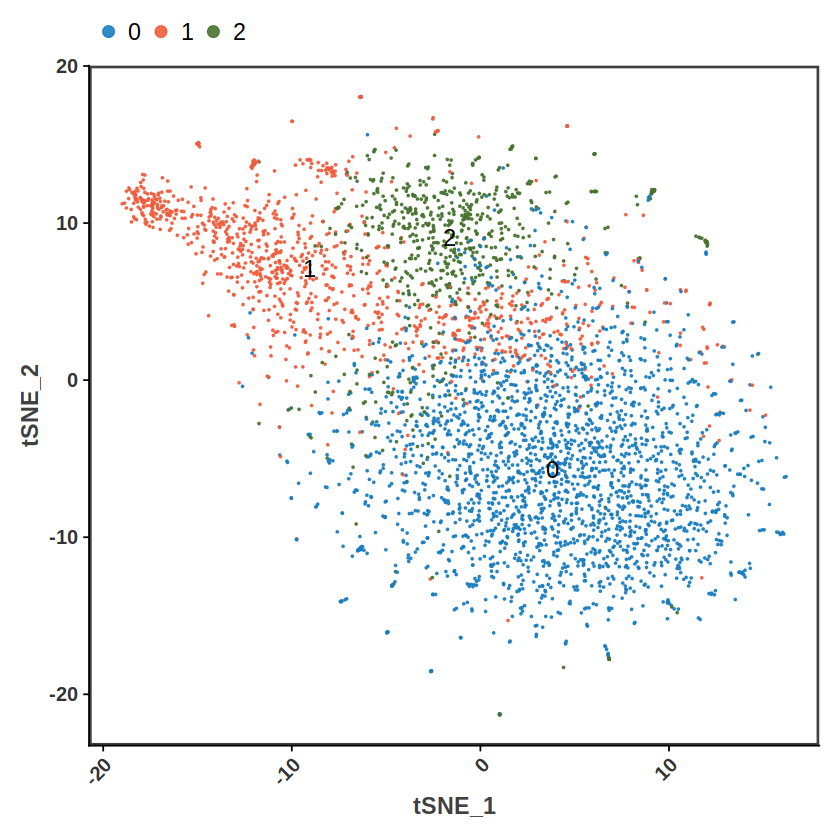

In [86]:
p.ct <- DimPlot(CD45pPBMC.NK, reduction = "tsne",label = T,label.size = 5, cols = c("#197EC0E5","#F05C3BE5","#46732EE5")) + mytheme
p.ct

In [12]:
CD45pPBMC.NK <- NormalizeData(CD45pPBMC.NK, normalization.method = "LogNormalize", scale.factor = 10000)

In [32]:
mature <- c("CD160","CCL3","FCGR3A","GZMB")
cols <- c("grey88", "red")
for (i in 1:length(mature)) {
    p <- FeaturePlot(CD45pPBMC.NK, features = mature[i], reduction = "tsne", cols = cols) +
        theme(
            panel.border = element_rect(size = 1.5, colour = "grey45", fill = NA),
            axis.text = element_blank(), axis.title = element_blank(),
            axis.ticks = element_blank(), axis.line = element_blank()
        )
    ggsave(paste0("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.",mature[i],".pdf"),p,width = 5,height = 5)
}

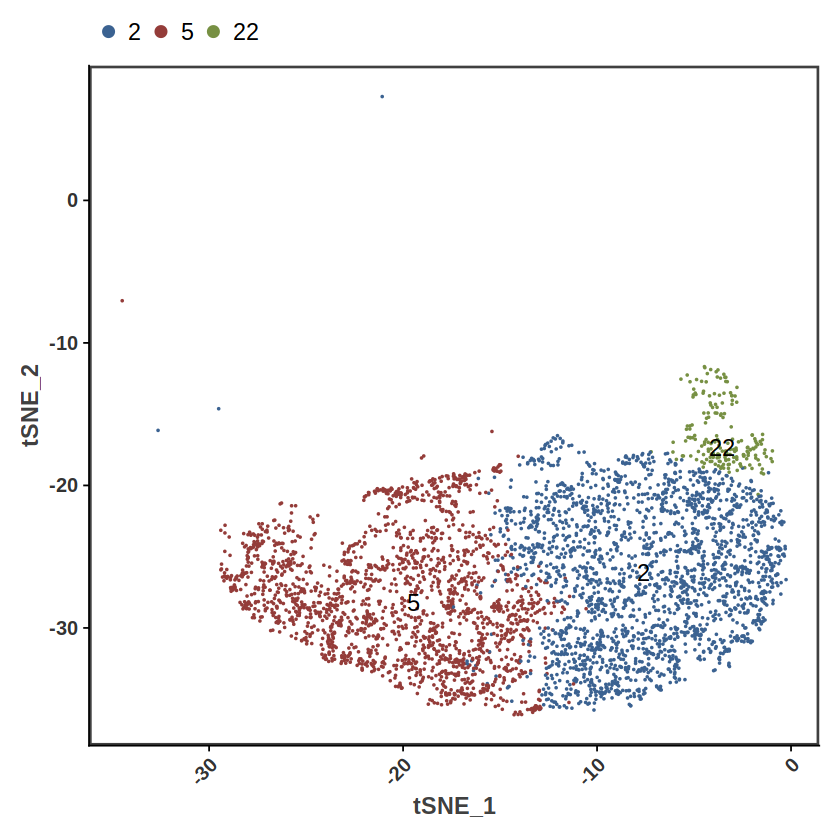

In [13]:
p.ct <- DimPlot(CD45pPBMC.NK, reduction = "tsne",label = T,label.size = 5, cols = c("#3b6291", "#943c39", "#779043", "#624c7c","#388498", "#bf7334", "#3f6899", "#9c403d", "#7d9847", "#675083", "#3b8ba1","#c97937")) + mytheme
p.ct

In [87]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.cluster.pdf",p.ct, width = 4,height = 4)

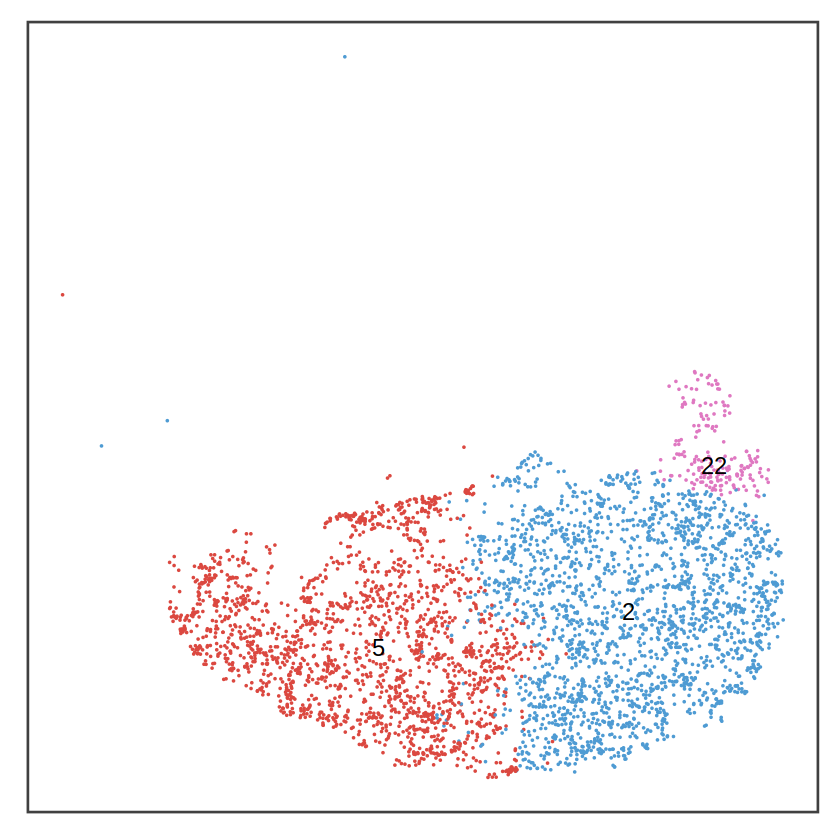

In [6]:
p.ct2 <- DimPlot(CD45pPBMC.NK, reduction = "tsne",label = T,label.size = 5,group.by = "seurat_clusters", 
                 cols = c("#4E9BD3","#DB4840","#DF78C1")) + mytheme
p.ct2

In [13]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.Blood.pdf",p.ct2, width = 4,height = 4)

ERROR: Error in plot_theme(plot): object 'p.ct2' not found


In [88]:
DefaultAssay(CD45pPBMC.NK) <- "RNA"
CD45pPBMC.NK <- ScaleData(CD45pPBMC.NK, features = rownames(CD45pPBMC.NK))

# CD56dim, CD16, CD57
# CD56brightCD16-NK
# CD56dimCD16+CD57-NK
# CD56dimCD16+CD57+NK
DefaultAssay(CD45pPBMC.NK) <- "RNA"


Centering and scaling data matrix



Warning message in SingleExIPlot(type = type, data = data, idents = idents, split = split, :
“All cells have the same value of KLK1.”
Warning message in SingleExIPlot(type = type, data = data, idents = idents, split = split, :
“All cells have the same value of GDF15.”
Warning message in SingleExIPlot(type = type, data = data, idents = idents, split = split, :
“All cells have the same value of ZNF521.”


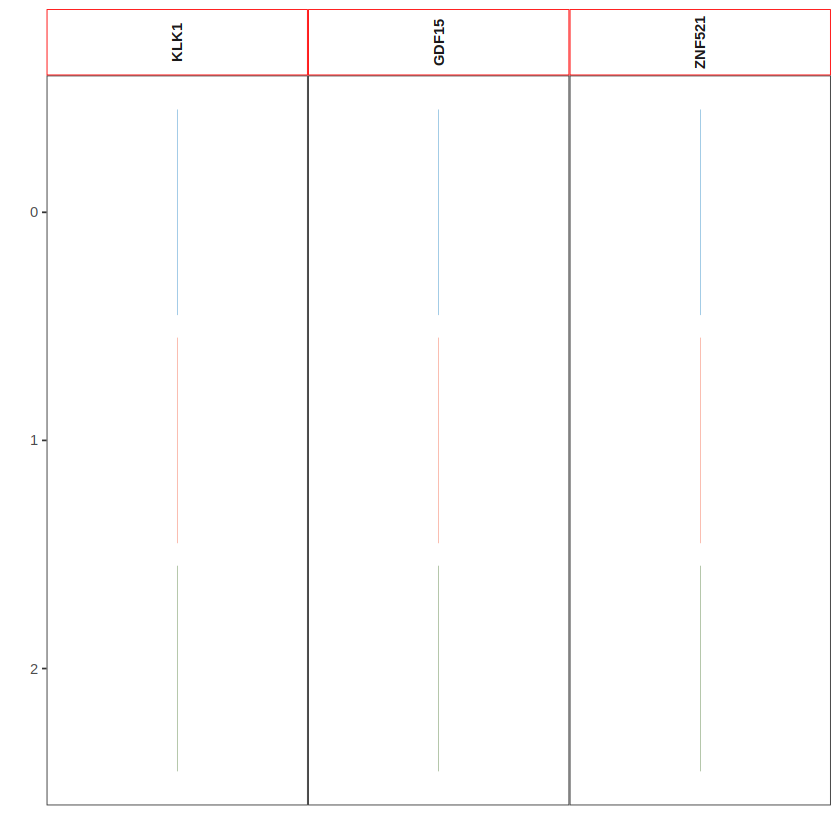

In [94]:
p.nk.sub <- VlnPlot(CD45pPBMC.NK, features = c("KLK1","GDF15","ZNF521"),
                    cols = c("#197EC0E5","#F05C3BE5","#46732EE5"),
                    pt.size = 0,direction = "horizontal",stacked = T,combine = T,x.lab = '', y.lab = '') +
  theme(axis.text.x = element_blank(),axis.ticks.x = element_blank())
p.nk.sub

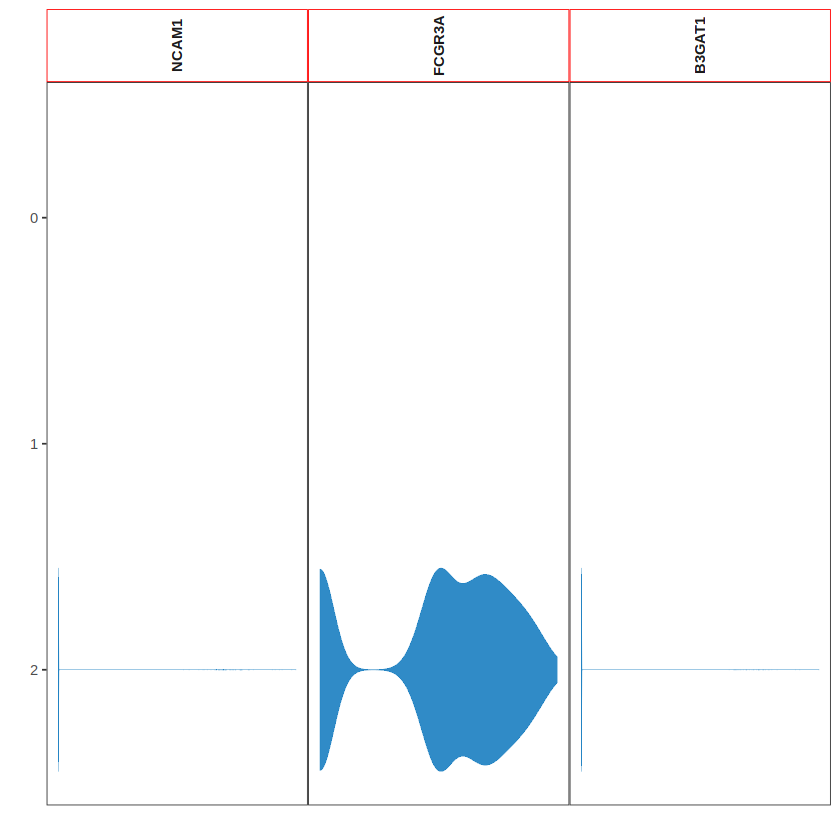

In [89]:
p.nk.sub <- VlnPlot(CD45pPBMC.NK, features = c("NCAM1","FCGR3A","B3GAT1"),
                    cols = c("#197EC0E5","#F05C3BE5","#46732EE5"), idents=c(2,5,22),
                    pt.size = 0,direction = "horizontal",stacked = T,combine = T,x.lab = '', y.lab = '') +
  theme(axis.text.x = element_blank(),axis.ticks.x = element_blank())
p.nk.sub

In [20]:
ggsave("/home/suyanchi/project/dab/results/case/figures/violin.nk.sub.pdf",p.nk.sub,width = 2.5,height = 4)

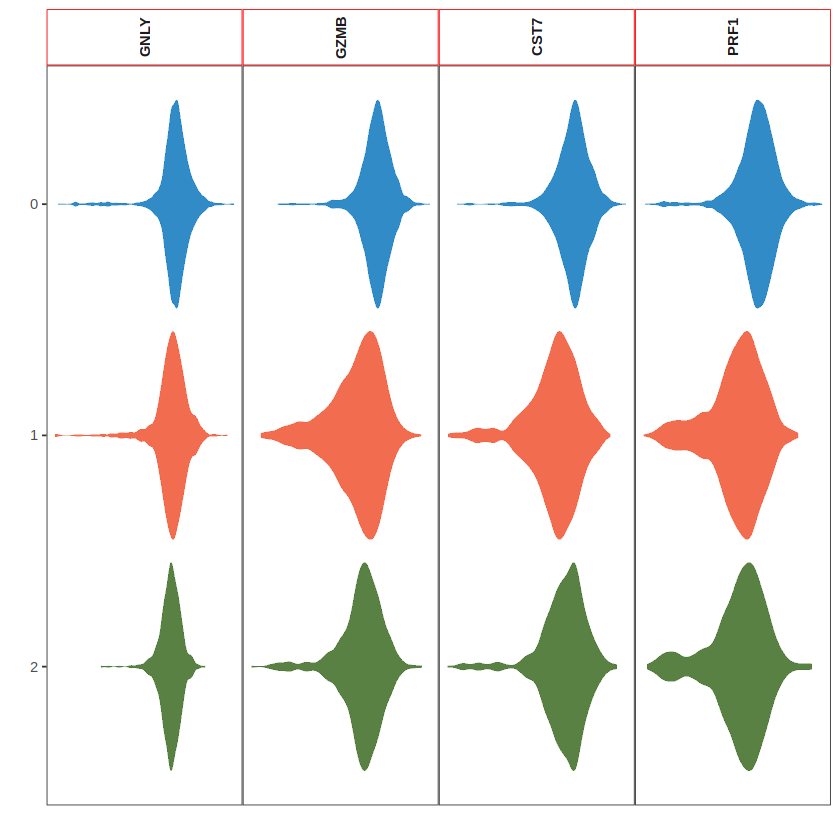

In [90]:
# GZMB
p.GZMB <- VlnPlot(CD45pPBMC.NK, features = c("GNLY","GZMB", "CST7", "PRF1"),pt.size = 0,direction = "horizontal", assay='integrated',
                  cols = c("#197EC0E5","#F05C3BE5","#46732EE5"),
                  stacked = T,combine = T,x.lab = '', y.lab = '') +
  NoLegend() + 
  theme(axis.text.x = element_blank(),axis.ticks.x = element_blank())
p.GZMB


In [13]:
ggsave("/home/suyanchi/project/dab/results/case/figures/violin.nk.marker.pdf",p.GZMB,width = 4,height = 4)

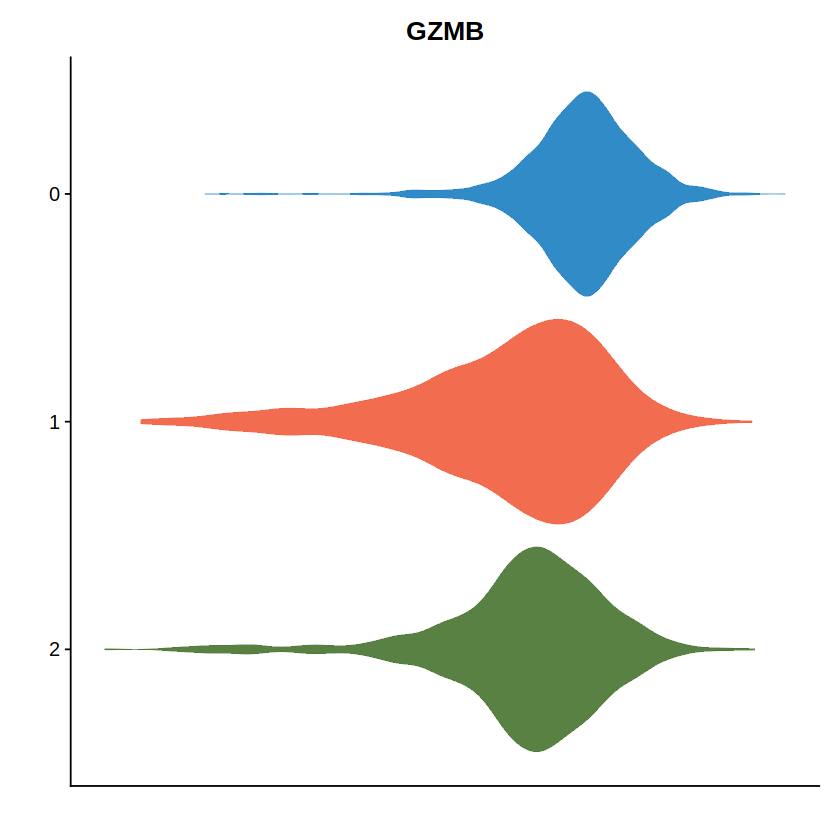

In [91]:
# GZMB
p.GZMB <- VlnPlot(CD45pPBMC.NK, features = c("GZMB"),pt.size = 0,direction = "horizontal", assay='integrated',
                  cols = c("#197EC0E5","#F05C3BE5","#46732EE5"),
                  stacked = T,combine = T,x.lab = '', y.lab = '') +
  NoLegend() + 
  theme(axis.text.x = element_blank(),axis.ticks.x = element_blank())
p.GZMB

In [11]:
ggsave("/home/suyanchi/project/dab/results/case/figures/violin.nk.marker.GZMB.pdf",p.GZMB,width = 2,height = 4)

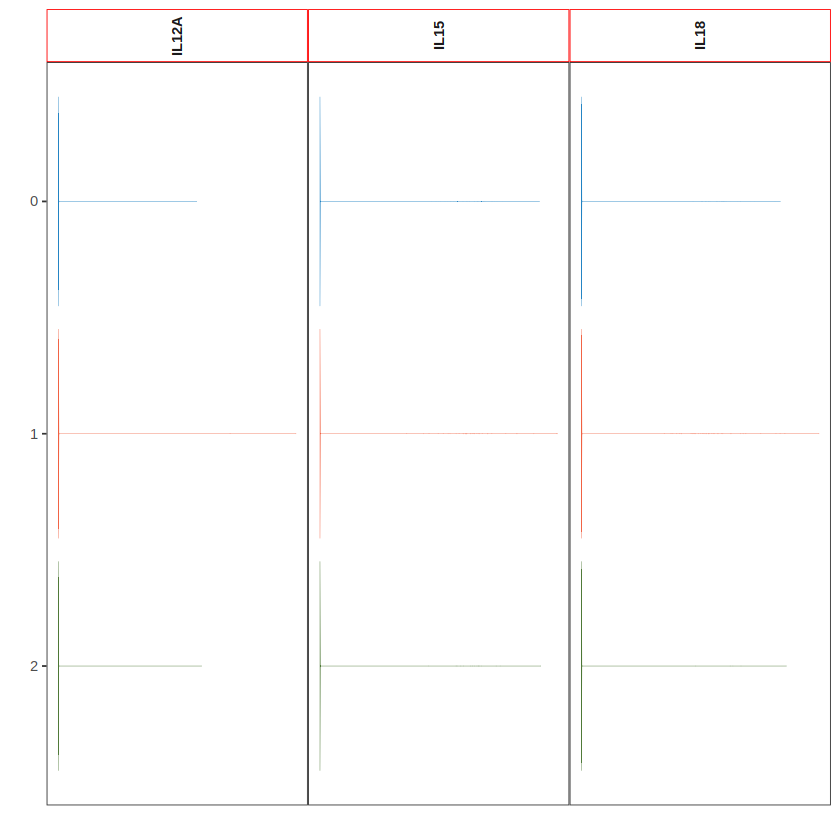

In [92]:
ILs <- c("IL12A","IL15","IL18")
p.ILs <- VlnPlot(CD45pPBMC.NK, features = ILs,pt.size = 0,direction = "horizontal",
                 cols = c("#197EC0E5","#F05C3BE5","#46732EE5"),
                 stacked = T,combine = T,x.lab = '', y.lab = '') +
  theme(axis.text.x = element_blank(),axis.ticks.x = element_blank())
p.ILs

In [93]:
ggsave("/home/suyanchi/project/dab/results/case/figures/violin.nk.ILs.pdf",p.ILs,width = 4,height = 6)

In [95]:
Idents(CD45pPBMC.NK) <- CD45pPBMC.NK$integrated_snn_res.0.3
all.markers <- FindAllMarkers(CD45pPBMC.NK, assay = "RNA",only.pos = T)
save(all.markers, file = "/home/suyanchi/project/dab/results/case/rds/CD45pPBMC.nk.all.markers.rda")

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



In [1]:
load('/home/suyanchi/project/dab/results/case/rds/CD45pPBMC.nk.all.markers.rda')
all.markers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
SPON2,8.185783e-142,0.9726660,0.915,0.651,1.460753e-137,0,SPON2
NKG7,1.825378e-112,0.3762698,1.000,0.998,3.257387e-108,0,NKG7
ACTB,3.753456e-111,0.6438054,1.000,0.992,6.698042e-107,0,ACTB
PFN1,1.891880e-98,0.4447601,0.998,0.991,3.376060e-94,0,PFN1
TMSB10,1.346330e-96,0.3831928,1.000,0.998,2.402527e-92,0,TMSB10
PRF1,1.765462e-95,0.6242840,0.969,0.860,3.150468e-91,0,PRF1
FGFBP2,1.980689e-94,0.6522253,0.962,0.785,3.534540e-90,0,FGFBP2
S100A4,3.108806e-91,0.6438065,0.968,0.888,5.547664e-87,0,S100A4
CFL1,5.473144e-85,0.4575578,0.993,0.971,9.766825e-81,0,CFL1


In [ ]:
write.table(all.markers, file = '/home/suyanchi/project/dab/results/case/out/all_markers.csv', sep=',', row.names = T, col.names = NA)

In [96]:
curr.ids <- c(0:2)
new.ids <- c("Bl1","Bl2","Bl3")
CD45pPBMC.NK$classI <- plyr::mapvalues(CD45pPBMC.NK$seurat_clusters, from = curr.ids, to = new.ids)

In [97]:
saveRDS(CD45pPBMC.NK,file = "/home/suyanchi/project/dab/results/case/rds/CD45pPBMC.integrated.nk.rds")

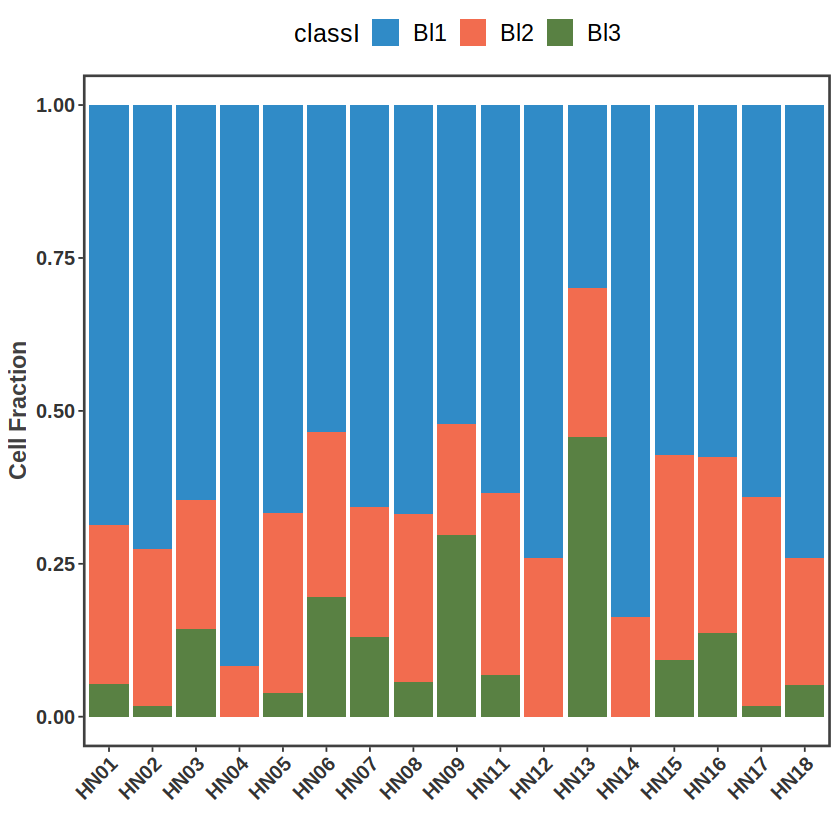

In [98]:
## Cell proportion
mytheme <- theme(panel.border = element_rect(size = 1.5, colour = "grey25"),
                 panel.grid = element_blank(),
                 axis.text.x = element_text(angle=45, hjust=1, vjust=1),
                 axis.text = element_text(size = 12,face = "bold",colour = "grey20"),
                 axis.title = element_text(size = 14,face = "bold",colour = "grey25"),
                 legend.position = "top", legend.direction = "horizontal",
                 legend.text = element_text(size = 14),legend.title = element_text(size = 15))

p.NK.prop <- ggplot(CD45pPBMC.NK@meta.data, aes(x = Sample, fill = classI)) +
  geom_bar(position = "fill") + theme_bw() + 
  scale_fill_manual(values = c("#197EC0E5","#F05C3BE5","#46732EE5")) +
  mytheme +
  guides(fill = guide_legend(nrow = 1)) +
  labs(y = "Cell Fraction", x = '')
p.NK.prop

In [99]:
ggsave("/home/suyanchi/project/dab/results/case/figures/CD45pPBMC.NK.cell.prop.pdf",p.NK.prop,width = 8,height = 4)

In [100]:
# cluster 0
genes.c0 <- all.markers[all.markers$cluster == 0,]$gene
write(genes.c0, file = "/home/suyanchi/project/dab/results/case/marker.c0.txt")
# cluster 1
genes.c1 <- all.markers[all.markers$cluster == 1,]$gene
write(genes.c1, file = "/home/suyanchi/project/dab/results/case/marker.c1.txt")
# cluster 2
genes.c2 <- all.markers[all.markers$cluster == 2,]$gene
write(genes.c2, file = "/home/suyanchi/project/dab/results/case/marker.c2.txt")

In [105]:
mat <- GetAssayData(CD45pPBMC.NK, assay = "RNA", slot = "scale.data")
mat[mat > 2] = 2
mat[mat < -2] = -2
cls.info <- sort(CD45pPBMC.NK$classI)
mat <- as.matrix(mat[intersect(all.markers$gene,rownames(mat)), names(cls.info)])

gene <- c("SPON2","FGFBP2","PRF1","PNF1","ACTB","FCGR3A","GZMB","S100A4",
          "GZMA","CST7","IGFBP7","CCL5", "KLRC1", "PATL2", "GNLY","ANXA5",
          "GZMK","XCL1","RPL36A","CD44","COTL1")
gene <- unique(gene)
gene.pos <- which(rownames(mat) %in% gene)
row.anno <- ComplexHeatmap::rowAnnotation(gene = ComplexHeatmap::anno_mark(at = gene.pos, labels = rownames(mat)[which(rownames(mat) %in% gene)]))
cols <- c("#4E9BD3","#DB4840","#DF78C1")
names(cols) <- levels(cls.info)
top.anno <- ComplexHeatmap::HeatmapAnnotation(
  cluster = ComplexHeatmap::anno_block(gp = grid::gpar(fill=cols), labels = levels(cls.info), labels_gp = grid::gpar(cex=0.5,col='white'))
)
col.fun <- circlize::colorRamp2(seq(min(mat),max(mat),length=3), c('#377EB8','white','#E41A1C'))
pdf("/home/suyanchi/project/dab/results/case/figures/diff.cls.heatmap.pdf",width = 10,height = 10)
ComplexHeatmap::Heatmap(matrix = mat, cluster_rows = F, cluster_columns = F,
                        show_column_names = F, show_row_names = F,
                        column_split = cls.info, right_annotation = row.anno,
                        column_title = NULL, top_annotation = top.anno,
                        heatmap_legend_param = list(title = 'Expression', title_position = 'leftcenter-rot'),col = col.fun)
dev.off()

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2